In [172]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [173]:
df=pd.read_csv('driver.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


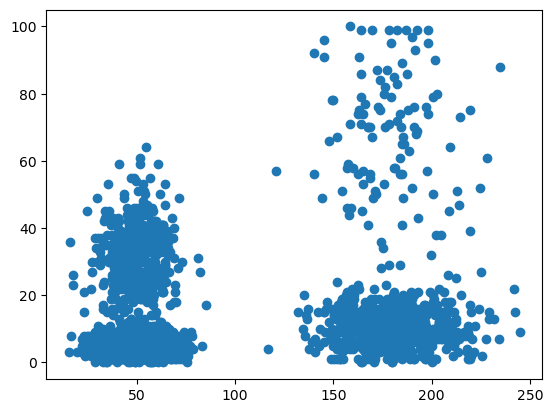

In [174]:
plt.scatter(df.mean_dist_day,df.mean_over_speed_perc)

In [175]:
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [176]:
y=km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 1, 1])

In [177]:
df['cluster']=y
df.head(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


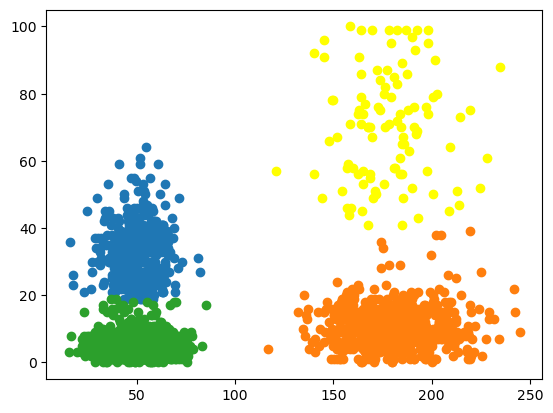

In [178]:
df1=df[df.cluster==0]
plt.scatter(df1.mean_dist_day,df1.mean_over_speed_perc)

df2=df[df['cluster']==1]
plt.scatter(df2.mean_dist_day,df2.mean_over_speed_perc)

df3=df[df['cluster']==2]
plt.scatter(df3.mean_dist_day,df3.mean_over_speed_perc)

df4=df[df['cluster']==3]
plt.scatter(df4.mean_dist_day,df4.mean_over_speed_perc,color='yellow')

# use minmax scaler if x and y axis are very different like one in thousand and other in single digit

In [179]:
scaler=MinMaxScaler()
scaler.fit(df[['mean_dist_day']])
df['mean_dist_day']=scaler.transform(df[['mean_dist_day']])

scaler.fit(df[['mean_over_speed_perc']])
df['mean_over_speed_perc']=scaler.transform(df[['mean_over_speed_perc']])
df

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,0.243032,0.28,0
1,3423313212,0.161425,0.25,0
2,3423313724,0.213809,0.27,0
3,3423311373,0.175208,0.22,0
4,3423310999,0.170367,0.25,0
...,...,...,...,...
3995,3423310685,0.630348,0.10,1
3996,3423312600,0.700702,0.05,1
3997,3423312921,0.677760,0.12,1
3998,3423313630,0.700571,0.05,1


In [180]:
km=KMeans(n_clusters=4)
y=km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
df['cluster']=y
df

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,0.243032,0.28,3
1,3423313212,0.161425,0.25,3
2,3423313724,0.213809,0.27,3
3,3423311373,0.175208,0.22,3
4,3423310999,0.170367,0.25,3
...,...,...,...,...
3995,3423310685,0.630348,0.10,1
3996,3423312600,0.700702,0.05,1
3997,3423312921,0.677760,0.12,1
3998,3423313630,0.700571,0.05,1


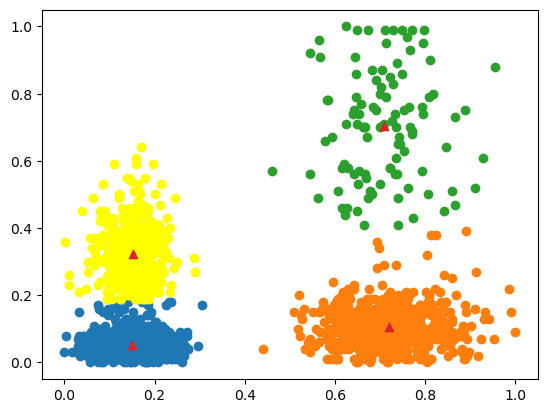

In [181]:
df1=df[df.cluster==0]
plt.scatter(df1.mean_dist_day,df1.mean_over_speed_perc)

df2=df[df['cluster']==1]
plt.scatter(df2.mean_dist_day,df2.mean_over_speed_perc)

df3=df[df['cluster']==2]
plt.scatter(df3.mean_dist_day,df3.mean_over_speed_perc)

df4=df[df['cluster']==3]
plt.scatter(df4.mean_dist_day,df4.mean_over_speed_perc,color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',label='centroid')


In [182]:
km.cluster_centers_

array([[0.15035823, 0.05204472],
       [0.71890399, 0.10520115],
       [0.70796483, 0.70288462],
       [0.15215608, 0.3236534 ]])

In [183]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [184]:
sse

[292.6563442304929,
 81.24817490831504,
 48.91142091013724,
 21.627961552686813,
 18.13405211996075,
 15.071962035371723,
 12.883042190287014,
 10.705767846058174,
 9.73463273368888]

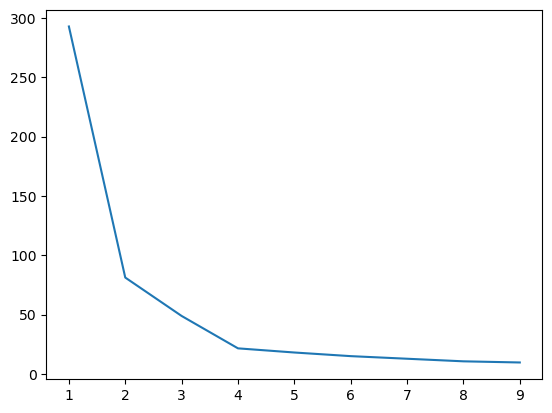

In [185]:
plt.plot(k_rng,sse)

therefore 2 and 4 cluters according to elbow rule is correct